# `SequentialFeatureSelector` analysis utilities

The functions shown here are meant to facilitate the analysis of feature selection results.
Here they are applied on a trained `ForwardFeatureGroupSelection` (SFS) instance but they can also be used with a a trained `SequentialFeatureSelector` instance.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from mlxtend import feature_selection

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


from eobox.ml import ffgs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

In [3]:
iris = load_iris(as_frame=True)
X_informative = iris.data
np.random.seed(0)
X_uninformative = pd.DataFrame(np.random.uniform(X_informative.min(), 
                                                 X_informative.max(), 
                                                 size=X_informative.shape))
X_uninformative.columns = [f"noinfo-{i}" for i in range(X_uninformative.shape[1])]
X = pd.concat([X_informative, X_uninformative], axis=1)
y = iris.target

## Feature selection

In [4]:
mod = KNeighborsClassifier(n_neighbors=4)
fsel = ffgs.ForwardFeatureGroupSelection(mod,
                                         k_features=X.shape[1],
                                         scoring='accuracy',
                                         verbose=1)
fgroups = [0, 0, 1, 1, 2, 3, 3, 3]
#fgroups = None
fsel = fsel.fit(X, y, custom_feature_names=X.columns, fgroups=fgroups)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
Features: 2/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
Features: 4/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 5/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 8/8

### SFS - metrics dataframes

#### Default

In [5]:
sfs_metrics_df = ffgs.sfs_metrics_to_dataframe(fsel, None)
sfs_metrics_df

,n_features,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,feature_idx_new,feature_names_new
iter,,,,,,,,,,
1,2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541,"(2, 3)","(petal length (cm), petal width (cm))"
2,4,"(0, 1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.966...",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.017137,0.013333,0.006667,"(0, 1)","(sepal length (cm), sepal width (cm))"
3,5,"(0, 1, 2, 3, 4)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.064122,0.049889,0.024944,"(4,)","(noinfo-0,)"
4,8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8666666666666667, 0.9333333333333333, 0.9, ...",0.886667,"(sepal length (cm), sepal width (cm), petal le...",0.064122,0.049889,0.024944,"(5, 6, 7)","(noinfo-1, noinfo-3, noinfo-2)"


#### Wide dataframe

Cross validation scores in additional columns. One row per selected feature. 
K(-folds) additional columns.

In [6]:
sfs_metrics_df_wide = ffgs.sfs_metrics_to_dataframe(fsel, "wide")
sfs_metrics_df_wide

,n_features,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,feature_idx_new,feature_names_new,cv_score_0,cv_score_1,cv_score_2,cv_score_3,cv_score_4
iter,,,,,,,,,,,,,,,
1,2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541,"(2, 3)","(petal length (cm), petal width (cm))",0.966667,0.966667,0.933333,0.966667,1.0
2,4,"(0, 1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.966...",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.017137,0.013333,0.006667,"(0, 1)","(sepal length (cm), sepal width (cm))",0.966667,0.966667,0.966667,0.966667,1.0
3,5,"(0, 1, 2, 3, 4)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.064122,0.049889,0.024944,"(4,)","(noinfo-0,)",0.966667,1.000000,0.933333,0.866667,1.0
4,8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8666666666666667, 0.9333333333333333, 0.9, ...",0.886667,"(sepal length (cm), sepal width (cm), petal le...",0.064122,0.049889,0.024944,"(5, 6, 7)","(noinfo-1, noinfo-3, noinfo-2)",0.866667,0.933333,0.900000,0.933333,0.8


#### Long dataframe

Cross validation scores in additional rows. 
K(-folds) additional rows.

In [7]:
sfs_metrics_df_long = ffgs.sfs_metrics_to_dataframe(fsel, "long")
sfs_metrics_df_long

,iter,fold,n_features,feature_idx,avg_score,feature_names,ci_bound,std_dev,std_err,feature_idx_new,feature_names_new,cv_score
1-0,1,0,2,"(2, 3)",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541,"(2, 3)","(petal length (cm), petal width (cm))",0.966667
1-1,1,1,2,"(2, 3)",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541,"(2, 3)","(petal length (cm), petal width (cm))",0.966667
1-2,1,2,2,"(2, 3)",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541,"(2, 3)","(petal length (cm), petal width (cm))",0.933333
1-3,1,3,2,"(2, 3)",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541,"(2, 3)","(petal length (cm), petal width (cm))",0.966667
1-4,1,4,2,"(2, 3)",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541,"(2, 3)","(petal length (cm), petal width (cm))",1.000000
2-0,2,0,4,"(0, 1, 2, 3)",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.017137,0.013333,0.006667,"(0, 1)","(sepal length (cm), sepal width (cm))",0.966667
2-1,2,1,4,"(0, 1, 2, 3)",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.017137,0.013333,0.006667,"(0, 1)","(sepal length (cm), sepal width (cm))",0.966667
2-2,2,2,4,"(0, 1, 2, 3)",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.017137,0.013333,0.006667,"(0, 1)","(sepal length (cm), sepal width (cm))",0.966667
2-3,2,3,4,"(0, 1, 2, 3)",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.017137,0.013333,0.006667,"(0, 1)","(sepal length (cm), sepal width (cm))",0.966667
2-4,2,4,4,"(0, 1, 2, 3)",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.017137,0.013333,0.006667,"(0, 1)","(sepal length (cm), sepal width (cm))",1.000000


### Plotting

In case of a forward feature group selection it makes sense to add a column with group names for plotting.

In [8]:
fgroup_names = {0: "sepal", 1: "petal", 2: "noinfo-A", 3: "noinfo-B"}

sfs_metrics_df = ffgs.sfs_metrics_to_dataframe(fsel, explode_cv_scores="wide", fgroups=fgroups, fgroup_names=fgroup_names)
sfs_metrics_df

,n_features,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,feature_idx_new,feature_names_new,cv_score_0,cv_score_1,cv_score_2,cv_score_3,cv_score_4,feature_groups,feature_group_new,feature_group_names,feature_group_name_new
iter,,,,,,,,,,,,,,,,,,,
1,2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(petal length (cm), petal width (cm))",0.027096,0.021082,0.010541,"(2, 3)","(petal length (cm), petal width (cm))",0.966667,0.966667,0.933333,0.966667,1.0,"(1,)",1,"(petal,)",petal
2,4,"(0, 1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.966...",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.017137,0.013333,0.006667,"(0, 1)","(sepal length (cm), sepal width (cm))",0.966667,0.966667,0.966667,0.966667,1.0,"(0, 1)",0,"(petal, sepal)",sepal
3,5,"(0, 1, 2, 3, 4)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.064122,0.049889,0.024944,"(4,)","(noinfo-0,)",0.966667,1.000000,0.933333,0.866667,1.0,"(0, 1, 2)",2,"(noinfo-A, petal, sepal)",noinfo-A
4,8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8666666666666667, 0.9333333333333333, 0.9, ...",0.886667,"(sepal length (cm), sepal width (cm), petal le...",0.064122,0.049889,0.024944,"(5, 6, 7)","(noinfo-1, noinfo-3, noinfo-2)",0.866667,0.933333,0.900000,0.933333,0.8,"(0, 1, 2, 3)",3,"(noinfo-A, noinfo-B, petal, sepal)",noinfo-B


#### Cross-validation accuracies and mean

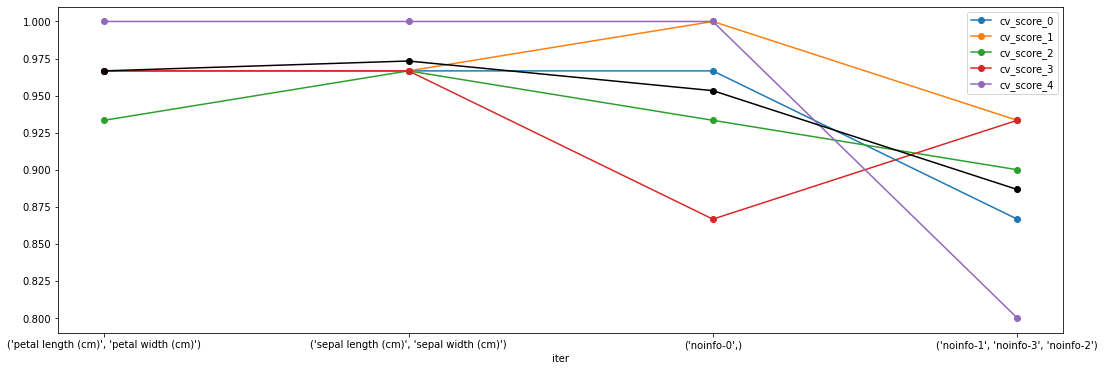

In [9]:
colnames_cv_scores = sfs_metrics_df.columns[sfs_metrics_df.columns.str.startswith("cv_score_")]
ax = sfs_metrics_df[colnames_cv_scores].plot(style='-o', 
                                             xticks=sfs_metrics_df.index,
                                             figsize=(18, 6))
ax = sfs_metrics_df.avg_score.plot(style='-o', c="k")
ax = ax.set_xticklabels(sfs_metrics_df.feature_names_new)

#### Cross-validation accuracies as boxplots

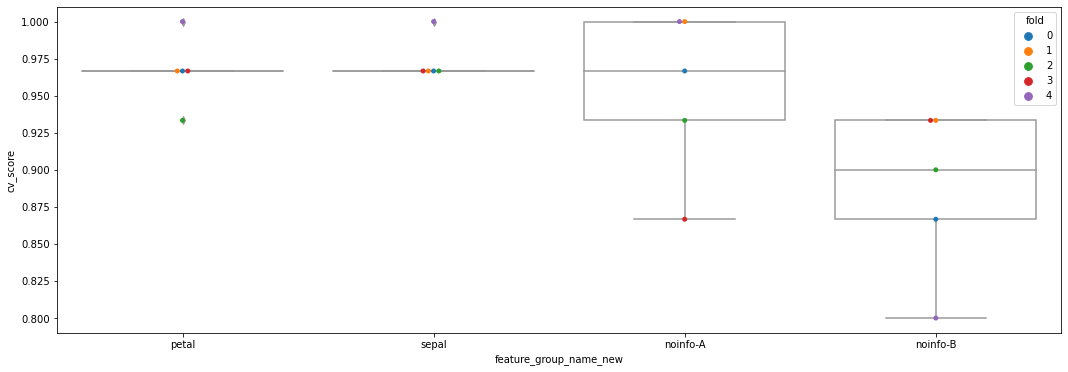

In [10]:
sfs_metrics_df_long = ffgs.sfs_metrics_to_dataframe(fsel, explode_cv_scores="long", fgroups=fgroups, fgroup_names=fgroup_names)

fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.boxplot(x="feature_group_name_new", y="cv_score", color="w", data=sfs_metrics_df_long)
ax = sns.swarmplot(x="feature_group_name_new", y="cv_score", hue="fold", data=sfs_metrics_df_long)